In [1]:
! export CUDA_VISIBLE_DEVICES=2
import sys, os
sys.path.append(os.path.abspath(os.path.join('./models')))
sys.path.append(os.path.abspath(os.path.join('./Data_Loaders')))
sys.path.append(os.path.abspath(os.path.join('./Loss_Functions')))

import pytorch_lightning as pl

from trainer import CoolSystem

from arch import SegNet, SegNet_Split
from arch_2 import Depth_Net
from resnet import ResNetUNet, ResNetUNet50

from densenet_2 import FCDenseNet103
import data_loader
import torch.nn as nn
import argparse
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision import transforms, utils
# import config
import torch
import tqdm
# import loss_functions
import gc
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage.transform import resize


def preprocess_image(image, dim = 640):
    '''
    Function to preprocess image
    '''
    h, w, c = image.shape
    image_out = resize(image, (480, 640))[:, :, :3]

    return image_out#, {"scale_y": h / dim, "scale_x": w / dim}

using gpu


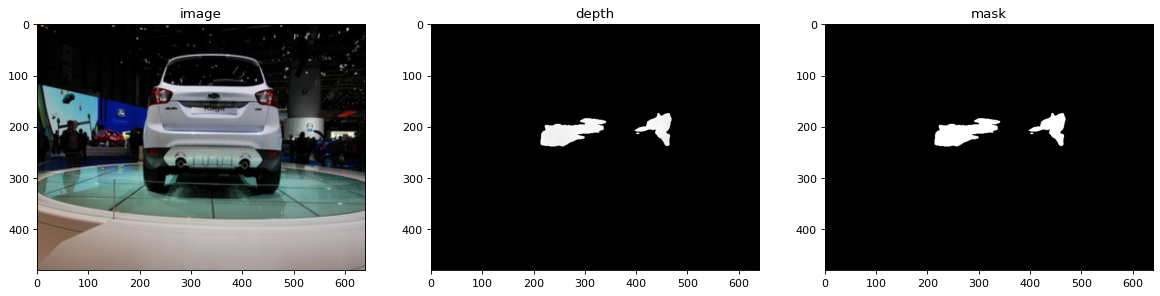

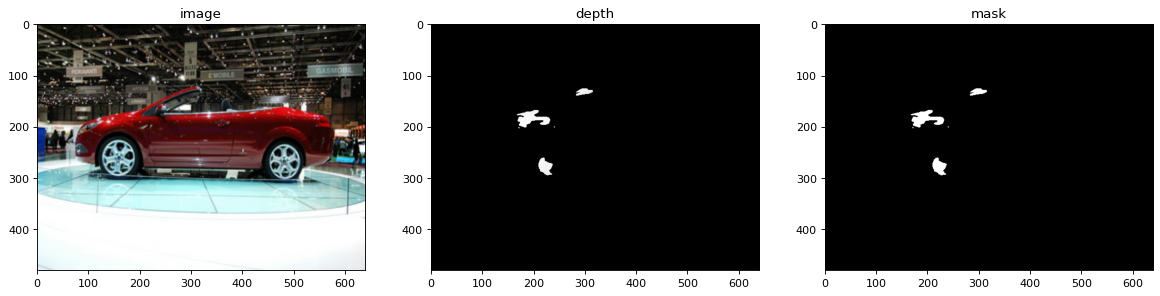

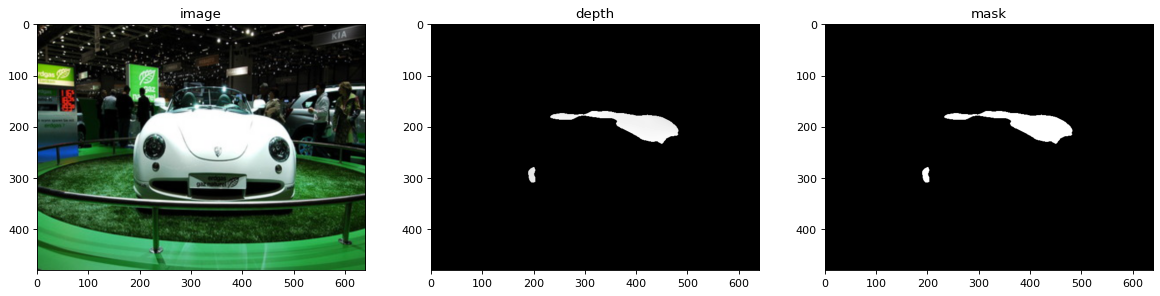

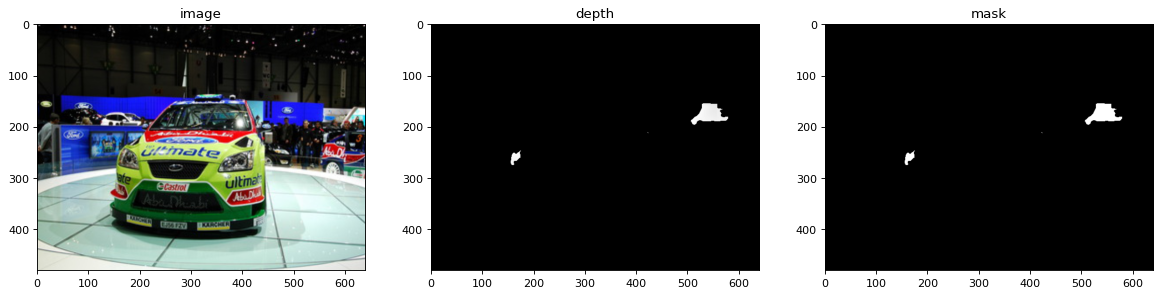

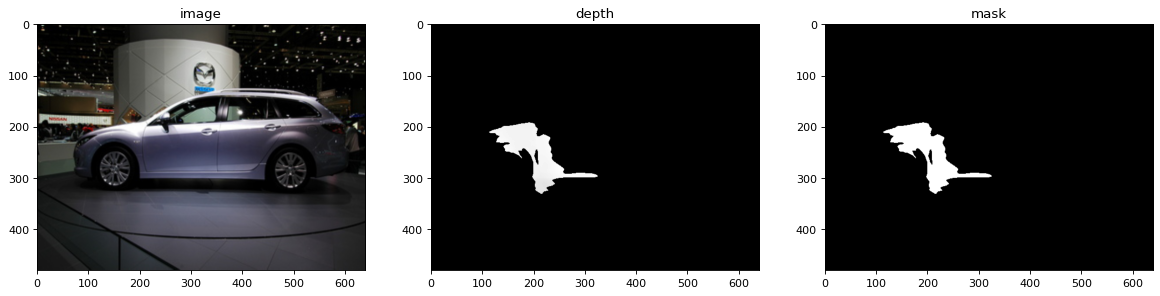

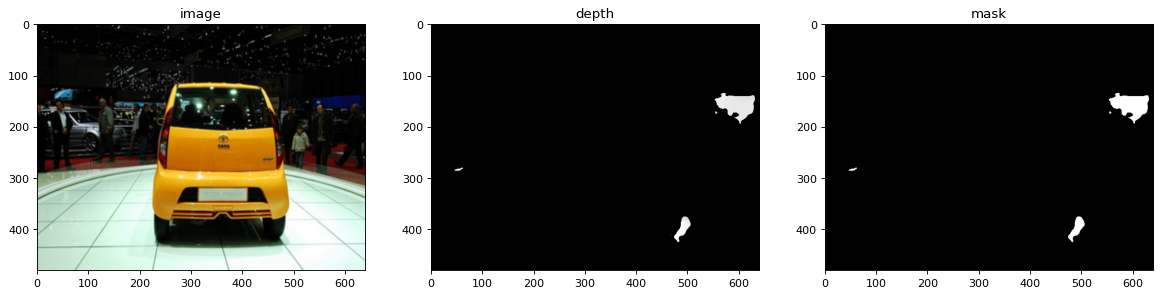

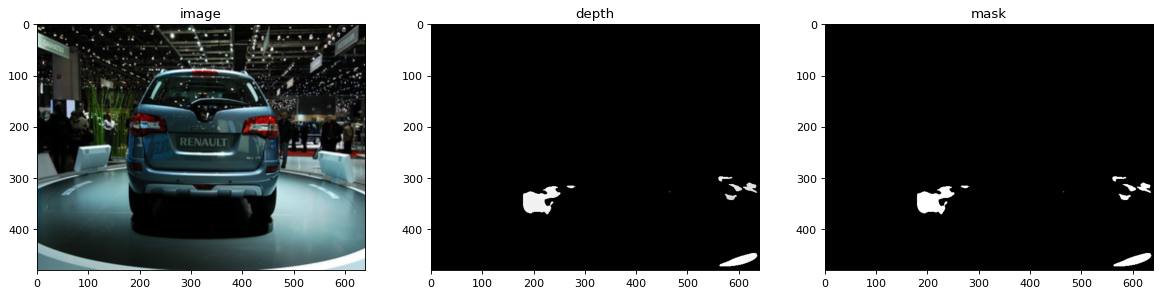

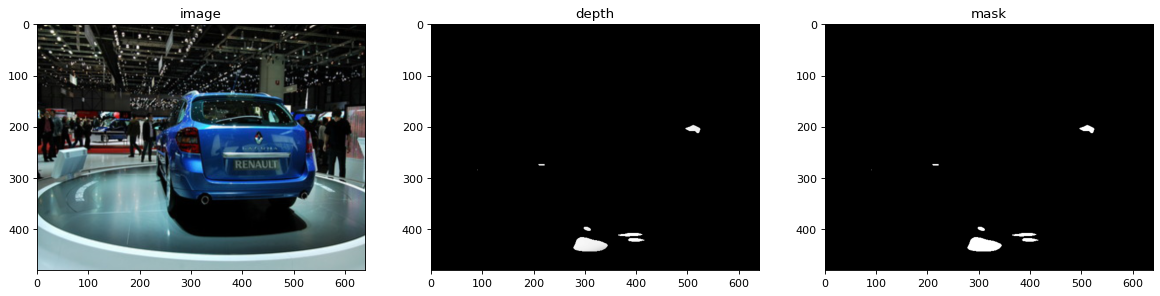

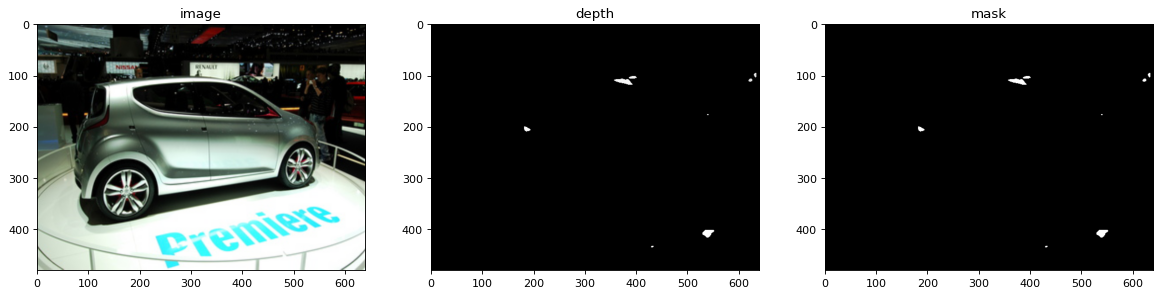

In [2]:
if __name__ == "__main__":
    
    # Get the available devices
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    # Load the network
    depth_network = ResNetUNet50()
    depth_network.load_state_dict(torch.load('../../models/04-33-01/ResNetUNet50_bce_0.3_w_photo_1.0_w_smooth_0.05_w_geometric_0.001.ckpt'))
    

    
    if torch.cuda.is_available():
        depth_network.to(device)
        print('using gpu')
    
    depth_network = depth_network.float()

    torch.no_grad()
    depth_network.eval()
    
    for i in range(1,10):   
        # Reading Image
        test_image = preprocess_image(plt.imread(f'/scratch/Warbucks/Self-supervised-NOCS/dataset/epfl/seq_0{i}/tripod_seq_0{i}_001.jpg'))
        test_image = torch.from_numpy(test_image.transpose((2, 0, 1)))
        if torch.cuda.is_available():
            test_image = test_image.to(device).float()
        # Reading Done

        # Evaluate the Model on the Test Image
        output = depth_network(test_image.unsqueeze(0))

        # Extract depth
        depth = output[0][0,0].cpu().detach().numpy()
        mask = output[1][0,0].cpu().detach().numpy()
        mask= (mask>0.5) * 1.0

        # Masking out the 
        depth = (depth * (mask)) 
        mask = (mask*255).astype(int)
        depth = (depth*255).astype(int)
        
        image = test_image.permute((1, 2, 0)).cpu().detach().numpy()
        fig=plt.figure(figsize=(18, 16), dpi= 80)
        plt.subplot(131)
        plt.imshow(image)
        plt.title('image')
        plt.subplot(132)
        plt.title('depth')
        plt.imshow(depth, 'gray')
        plt.subplot(133)
        plt.imshow(mask, 'gray')
        plt.title('mask')

        plt.show()

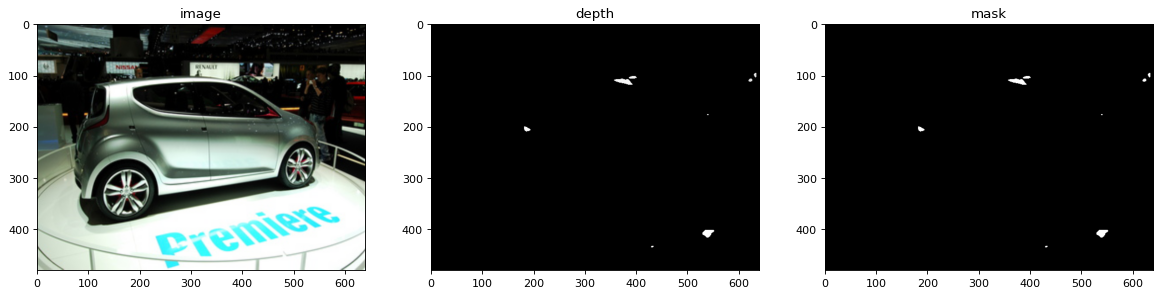

In [3]:
image = test_image.permute((1, 2, 0)).cpu().detach().numpy()
fig=plt.figure(figsize=(18, 16), dpi= 80)
plt.subplot(131)
plt.imshow(image)
plt.title('image')
plt.subplot(132)
plt.title('depth')
plt.imshow(depth, 'gray')
plt.subplot(133)
plt.imshow(mask, 'gray')
plt.title('mask')

plt.show()